In [100]:
# importing libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

#from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [101]:
# importing the dataset
titanic = pd.read_csv('Titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
titanic.dropna(inplace = True)

In [103]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Change 'Sex' column to be binary 0 or 1 instead of string.

In [104]:
titanic['Sex'] = titanic['Sex'].replace('female', 0)
titanic['Sex'] = titanic['Sex'].replace('male', 1)
titanic['Sex'] = titanic['Sex'].astype('category')


We must also change the embarked column in the same way.

In [105]:
titanic['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [106]:
titanic['Embarked'] = titanic['Embarked'].replace('C', 0)
titanic['Embarked'] = titanic['Embarked'].replace('S', 1)
titanic['Embarked'] = titanic['Embarked'].replace('Q', 2)
titanic['Embarked'] = titanic['Embarked'].astype('category')

In [107]:
titanic.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

In [108]:
X = titanic.iloc[:, [2,4,5,6,7,9,11]]
X.shape

(183, 7)

In [109]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0,38.0,1,0,71.2833,0
3,1,0,35.0,1,0,53.1000,1
6,1,1,54.0,0,0,51.8625,1
10,3,0,4.0,1,1,16.7000,1
11,1,0,58.0,0,0,26.5500,1
...,...,...,...,...,...,...,...
871,1,0,47.0,1,1,52.5542,1
872,1,1,33.0,0,0,5.0000,1
879,1,0,56.0,0,1,83.1583,0
887,1,0,19.0,0,0,30.0000,1


In [110]:
y = titanic.iloc[:, 1]
y.shape

(183,)

Split into training, test and validation sets.

In [111]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)
# this creates our training set, and keeps the remaining 20% in one set to be used as both test and validation.

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
#this generates the validations and test sets. 

Now train an unpruned decision tree. Fit the model and plot it.

In [112]:
unpruned = DecisionTreeClassifier(max_depth=None, random_state=4)
unpruned_tree = unpruned.fit(X_train, y_train)

[Text(0.4216101694915254, 0.9666666666666667, 'X[1] <= 0.5\ngini = 0.446\nsamples = 146\nvalue = [49, 97]'),
 Text(0.0847457627118644, 0.9, 'X[2] <= 3.0\ngini = 0.155\nsamples = 71\nvalue = [6, 65]'),
 Text(0.05084745762711865, 0.8333333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.11864406779661017, 0.8333333333333334, 'X[5] <= 10.481\ngini = 0.109\nsamples = 69\nvalue = [4, 65]'),
 Text(0.0847457627118644, 0.7666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15254237288135594, 0.7666666666666667, 'X[5] <= 11.488\ngini = 0.084\nsamples = 68\nvalue = [3, 65]'),
 Text(0.06779661016949153, 0.7, 'X[2] <= 43.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.03389830508474576, 0.6333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1016949152542373, 0.6333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23728813559322035, 0.7, 'X[5] <= 29.356\ngini = 0.06\nsamples = 65\nvalue = [2, 63]'),
 Text(0.1694915254237288, 0.

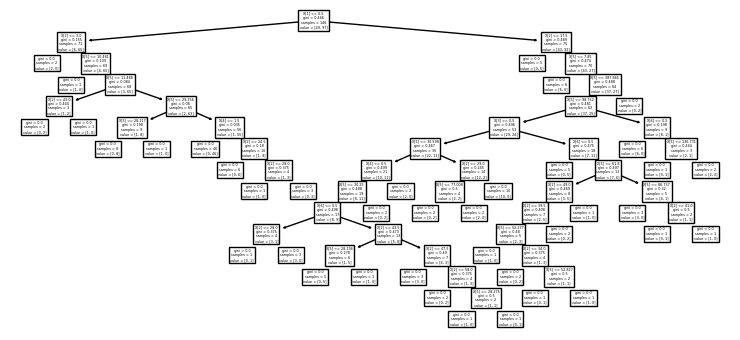

In [113]:
tree.plot_tree(unpruned_tree)

Compute the accuracy of the model on the development set.

In [114]:
print("Performance without pruning:", unpruned.score(X_valid, y_valid))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.8888888888888888
At depth: 14


Look at various pruning depths and see which creates the most accurate model. 

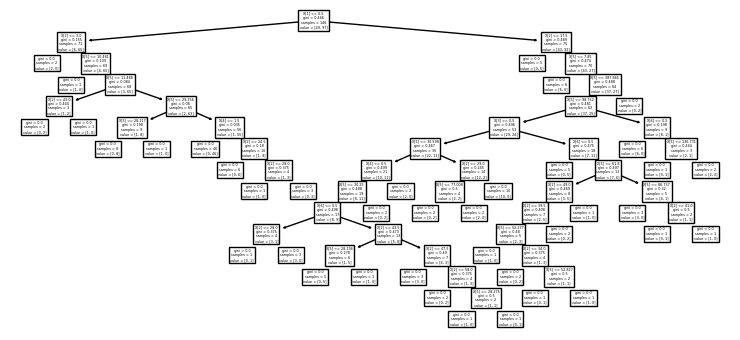

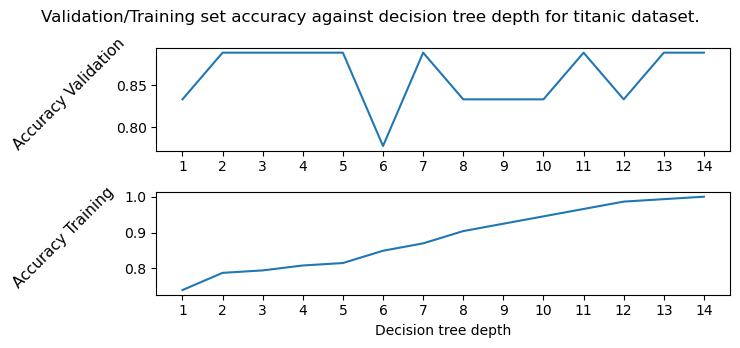

In [115]:
unpruned_depths = range(1,unpruned.tree_.max_depth+1)
training_scores = []
unpruned_scores = [] 
for d in unpruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=4)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)  
  valid_score = clf.score(X_valid, y_valid)
  unpruned_scores.append(valid_score)
  training_scores.append(train_score)
  tree.plot_tree(unpruned_tree) 

fig, axs = plt.subplots(2)
axs[0].plot(unpruned_depths, unpruned_scores)
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = plt.GridSpec(2, 2)
ax.update(wspace=0.5, hspace=0.5)
plt.xlabel("Decision tree depth")
axs[0].xaxis.set_ticks(unpruned_depths)
fig.suptitle('Validation/Training set accuracy against decision tree depth for titanic dataset.')
plt.subplots_adjust(bottom=0.5, right=0.5, top=0.9)
axs[1].plot(unpruned_depths, training_scores)
axs[1].xaxis.set_ticks(unpruned_depths)
axs[0].set_ylabel('Accuracy Validation', rotation=45, fontsize = 11, labelpad=30)
axs[1].set_ylabel('Accuracy Training', rotation = 45, fontsize = 11, labelpad = 40)
plt.show()

From this graph, we can see the data on this dataset is likely overfitted. With so many variables to consider it is a reasonalbe outcome. But actually our model is the most accurate at depth of 3.

In [116]:
for n in range(0, len(training_scores)):
    print(f"Performance on training at depth {n}:", training_scores[n])
    print(f"Performance on validation at depth {n}:", unpruned_scores[n])

Performance on training at depth 0: 0.7397260273972602
Performance on validation at depth 0: 0.8333333333333334
Performance on training at depth 1: 0.7876712328767124
Performance on validation at depth 1: 0.8888888888888888
Performance on training at depth 2: 0.7945205479452054
Performance on validation at depth 2: 0.8888888888888888
Performance on training at depth 3: 0.8082191780821918
Performance on validation at depth 3: 0.8888888888888888
Performance on training at depth 4: 0.815068493150685
Performance on validation at depth 4: 0.8888888888888888
Performance on training at depth 5: 0.8493150684931506
Performance on validation at depth 5: 0.7777777777777778
Performance on training at depth 6: 0.8698630136986302
Performance on validation at depth 6: 0.8888888888888888
Performance on training at depth 7: 0.9041095890410958
Performance on validation at depth 7: 0.8333333333333334
Performance on training at depth 8: 0.9246575342465754
Performance on validation at depth 8: 0.8333333333

Plot a line of training and development accuracies on the same graph. 

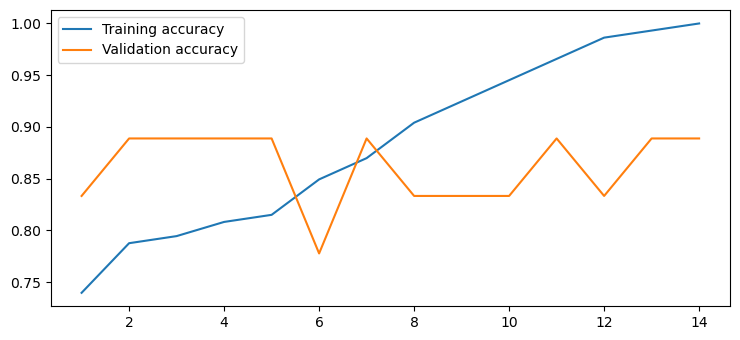

In [117]:
plt.plot(unpruned_depths, training_scores, label = "Training accuracy")
plt.plot(unpruned_depths, unpruned_scores, label = "Validation accuracy")
plt.legend()
plt.show()

The training line follows as we would expect, as it learns more about the data and what result that data had it builds a more complete model and learns to predict the model more accurately.
The validation model however is stuck between 0.85 and 0.95 at various points depending on the depth. This could perhaps suggest it is overfitted as it is not getting any more accurate at higher depths.

It would appear from this graph that the optimum depth is 4. So I will try the test data with such a max_depth.

In [118]:
pruned = DecisionTreeClassifier(max_depth=4, random_state=4)
pruned_tree = pruned.fit(X_train, y_train)

predictions = pruned_tree.predict(X_test)

In [119]:
print("Performance after pruning to a depth of 4:", pruned.score(X_test, y_test))

Performance after pruning to a depth of 4: 0.7894736842105263


In [120]:
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[ 3  0]
 [ 4 12]]


Our model seems to have missed the mark on some occasions, but gets it correct the majority of the time 79%.